In [21]:
import pandas as pd

df = pd.read_excel(r'D:\Downloads\DSTC vòng 3\finance data\HNXINDEX_Finance.xlsx')
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      299 non-null    object 
 1   year        299 non-null    int64  
 2   ratios      299 non-null    object 
 3   EBITMargin  299 non-null    float64
 4   ROA         299 non-null    float64
 5   ROE         299 non-null    float64
 6   ROIC        299 non-null    float64
 7   EPS         299 non-null    float64
 8   PE          299 non-null    float64
 9   PB          299 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 23.5+ KB


In [22]:
df_hnx = pd.read_excel(r'D:\Downloads\DSTC vòng 3\cleaned data\HNXINDEX_cleaned.xlsx')
df_hnx["ticker"].nunique()

76

In [23]:
avail_ticker = df.loc[df['ticker'].isin(df_hnx['ticker']), 'ticker'].unique().tolist()
print(len(avail_ticker))

73


In [24]:
df = df[df["ticker"].isin(avail_ticker)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 5 to 294
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ticker      73 non-null     object 
 1   year        73 non-null     int64  
 2   ratios      73 non-null     object 
 3   EBITMargin  73 non-null     float64
 4   ROA         73 non-null     float64
 5   ROE         73 non-null     float64
 6   ROIC        73 non-null     float64
 7   EPS         73 non-null     float64
 8   PE          73 non-null     float64
 9   PB          73 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 6.3+ KB


In [25]:
df["EBITMargin"].describe()

count    73.000000
mean      0.071655
std       0.274930
min      -1.743362
25%       0.011889
50%       0.046226
75%       0.167819
max       0.606549
Name: EBITMargin, dtype: float64

In [26]:
df["EBITMargin"] = df["EBITMargin"].clip(-1,1)
df["EBITMargin"].describe()

count    73.000000
mean      0.081838
std       0.213724
min      -1.000000
25%       0.011889
50%       0.046226
75%       0.167819
max       0.606549
Name: EBITMargin, dtype: float64

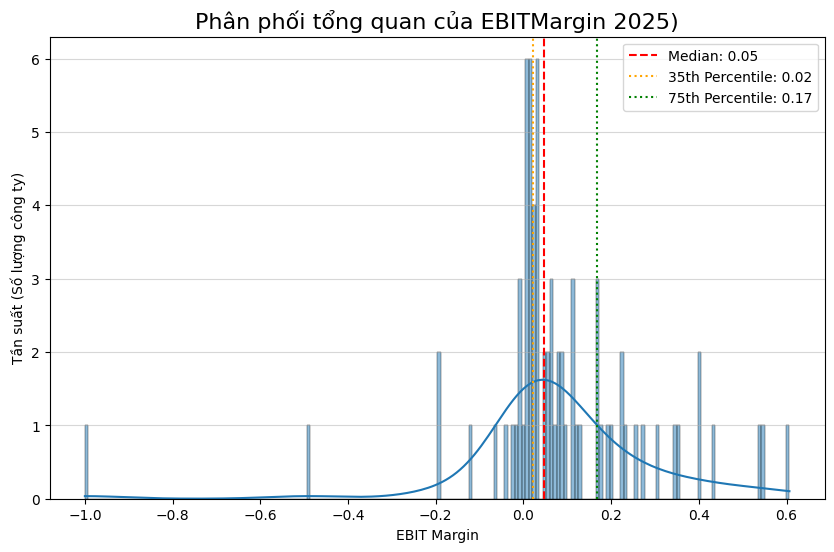

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['EBITMargin'], kde=True, bins=200)
plt.title('Phân phối tổng quan của EBITMargin 2025)', fontsize=16)
plt.xlabel('EBIT Margin')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['EBITMargin'].median(), color='red', linestyle='--', label=f"Median: {df['EBITMargin'].median():.2f}")
plt.axvline(df['EBITMargin'].quantile(0.35), color='orange', linestyle=':', label=f"35th Percentile: {df['EBITMargin'].quantile(0.35):.2f}")
plt.axvline(df['EBITMargin'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['EBITMargin'].quantile(0.75):.2f}")
plt.legend()
plt.show()

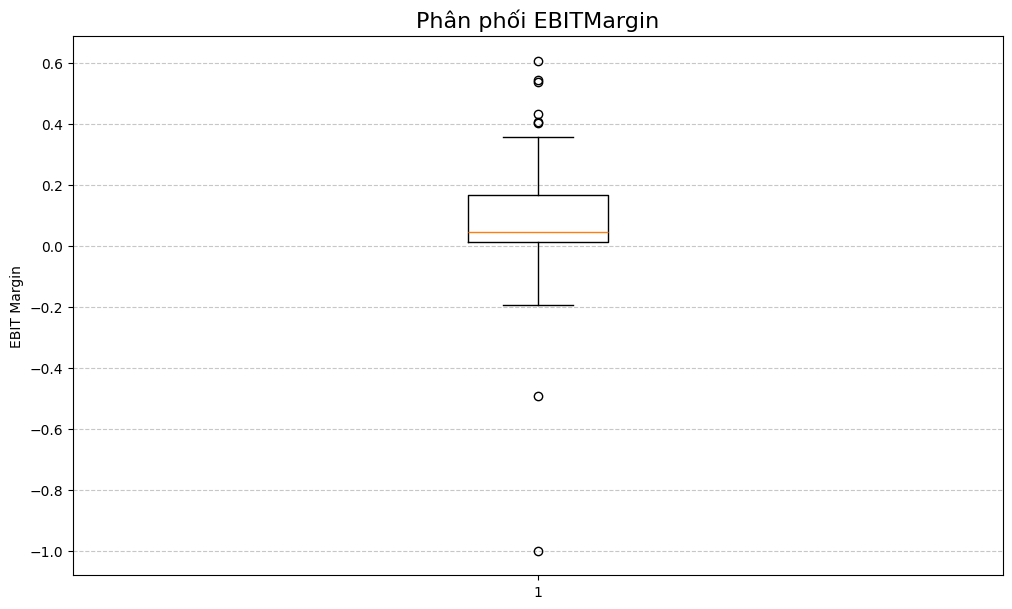

In [28]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["EBITMargin"])
plt.title('Phân phối EBITMargin', fontsize=16)
plt.ylabel('EBIT Margin')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
df["ROA"].describe()

count    73.000000
mean      0.022031
std       0.037934
min      -0.070901
25%       0.004517
50%       0.017531
75%       0.037227
max       0.148945
Name: ROA, dtype: float64

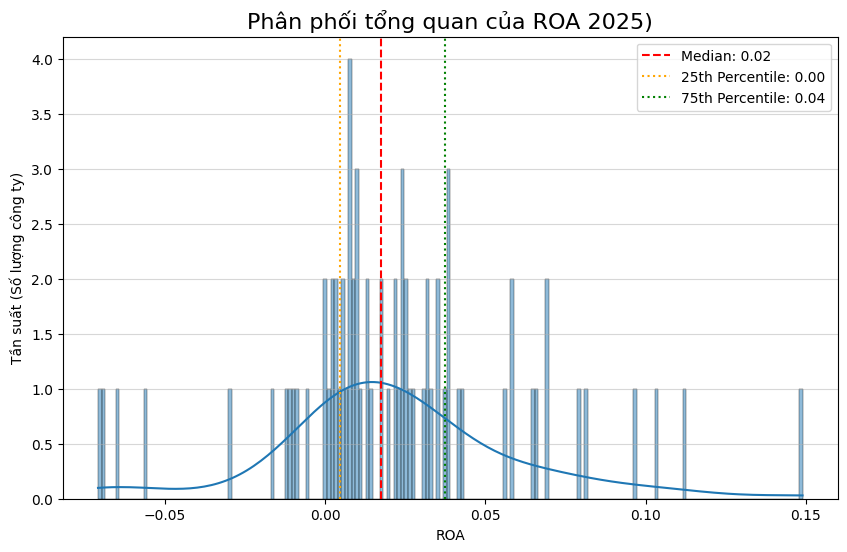

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROA'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROA 2025)', fontsize=16)
plt.xlabel('ROA')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROA'].median(), color='red', linestyle='--', label=f"Median: {df['ROA'].median():.2f}")
plt.axvline(df['ROA'].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df['ROA'].quantile(0.25):.2f}")
plt.axvline(df['ROA'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROA'].quantile(0.75):.2f}")
plt.legend()
plt.show()

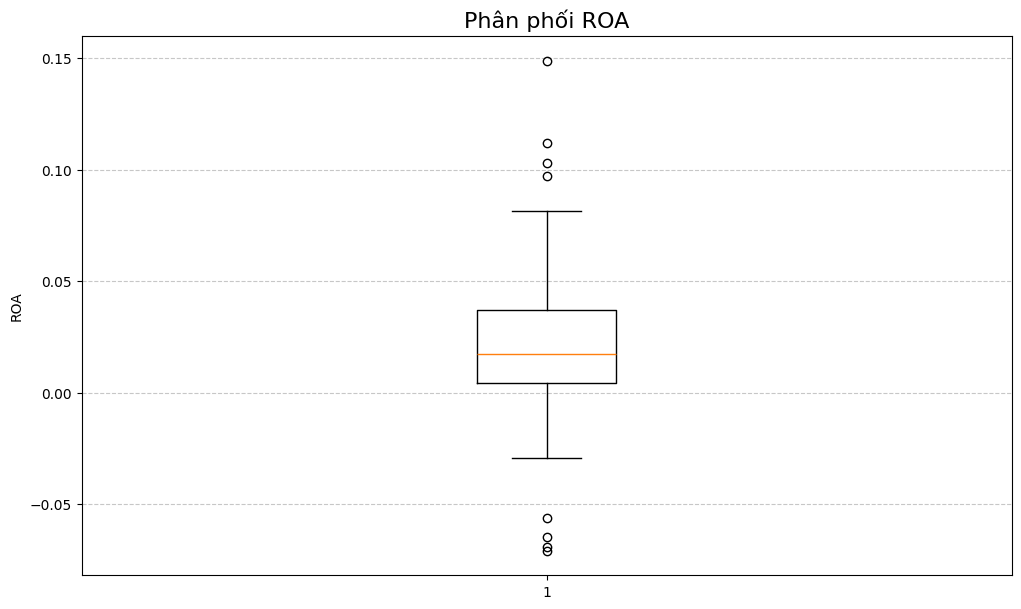

In [31]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["ROA"])
plt.title('Phân phối ROA', fontsize=16)
plt.ylabel('ROA')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
df["ROE"].describe()

count    73.000000
mean      0.051771
std       0.083902
min      -0.164345
25%       0.010666
50%       0.035336
75%       0.091155
max       0.341306
Name: ROE, dtype: float64

In [33]:
df["ROE"] = df["ROE"].clip(-1,1)
df["ROE"].describe()

count    73.000000
mean      0.051771
std       0.083902
min      -0.164345
25%       0.010666
50%       0.035336
75%       0.091155
max       0.341306
Name: ROE, dtype: float64

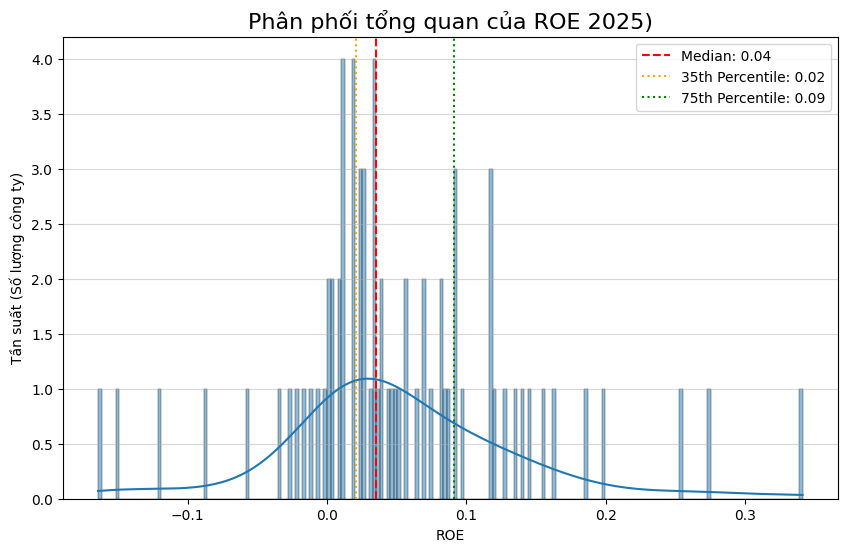

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROE'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROE 2025)', fontsize=16)
plt.xlabel('ROE')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROE'].median(), color='red', linestyle='--', label=f"Median: {df['ROE'].median():.2f}")
plt.axvline(df['ROE'].quantile(0.35), color='orange', linestyle=':', label=f"35th Percentile: {df['ROE'].quantile(0.35):.2f}")
plt.axvline(df['ROE'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROE'].quantile(0.75):.2f}")
plt.legend()
plt.show()

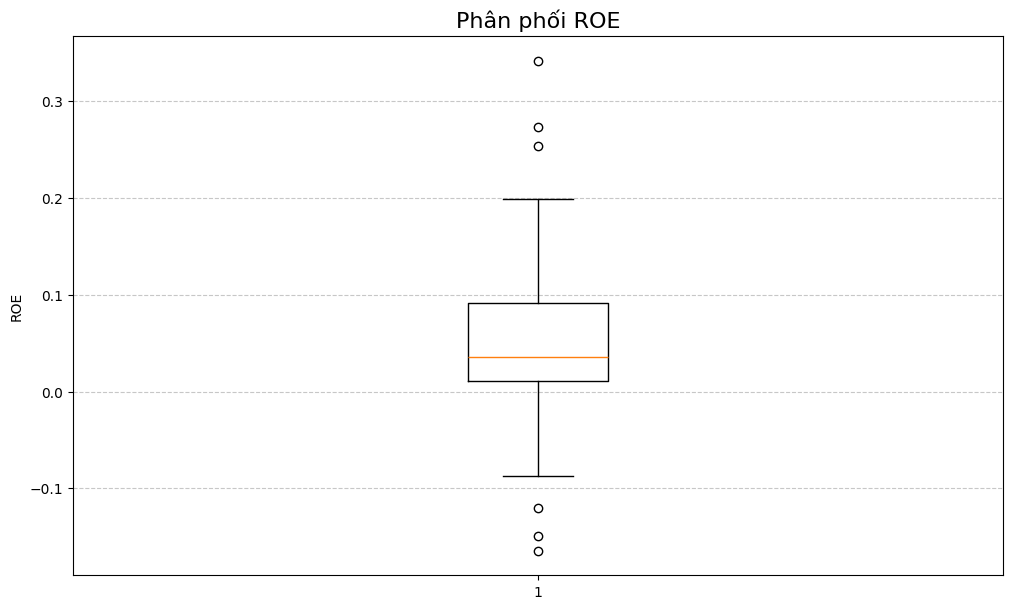

In [35]:
plt.figure(figsize=(12, 7))
plt.boxplot(df["ROE"])
plt.title('Phân phối ROE', fontsize=16)
plt.ylabel('ROE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
df["ROIC"].describe()

count    73.000000
mean      0.035821
std       0.061814
min      -0.155320
25%       0.005239
50%       0.028653
75%       0.056150
max       0.248042
Name: ROIC, dtype: float64

In [37]:
df = df[(df["ROIC"] >= -1) & (df["ROIC"] < 1)]
df["ROIC"].describe()

count    73.000000
mean      0.035821
std       0.061814
min      -0.155320
25%       0.005239
50%       0.028653
75%       0.056150
max       0.248042
Name: ROIC, dtype: float64

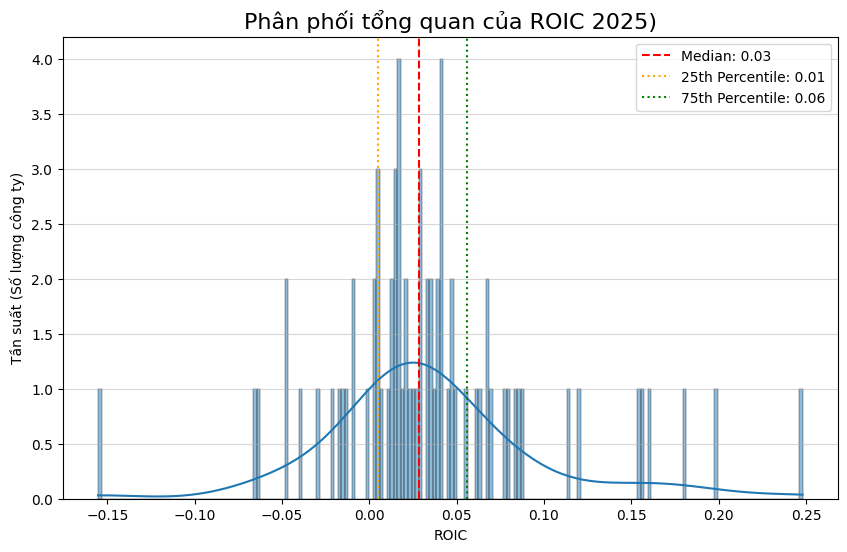

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['ROIC'], kde=True, bins=200)
plt.title('Phân phối tổng quan của ROIC 2025)', fontsize=16)
plt.xlabel('ROIC')
plt.ylabel('Tần suất (Số lượng công ty)')
plt.grid(axis='y', alpha=0.5)

plt.axvline(df['ROIC'].median(), color='red', linestyle='--', label=f"Median: {df['ROIC'].median():.2f}")
plt.axvline(df['ROIC'].quantile(0.25), color='orange', linestyle=':', label=f"25th Percentile: {df['ROIC'].quantile(0.25):.2f}")
plt.axvline(df['ROIC'].quantile(0.75), color='green', linestyle=':', label=f"75th Percentile: {df['ROIC'].quantile(0.75):.2f}")
plt.legend()
plt.show()

In [39]:
df["ticker"].nunique()

73

In [40]:
ticker_verified = []
i = 0
for ticker in df["ticker"].unique():
    row = df[df["ticker"] == ticker].iloc[0]  
    i+=1
    if (
        row["EBITMargin"] >= 0.02
        and row["ROA"] >= 0.01
        and row["ROE"] >= 0.01
        and row["ROIC"] >= 0.02
    ):
        ticker_verified.append(ticker)

print(len(ticker_verified))

33
